<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#缺失值-&amp;-异常值-处理" data-toc-modified-id="缺失值-&amp;-异常值-处理-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>缺失值 &amp; 异常值 处理</a></span></li></ul></li><li><span><a href="#宏观分析" data-toc-modified-id="宏观分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>宏观分析</a></span><ul class="toc-item"><li><span><a href="#订单的价格分布" data-toc-modified-id="订单的价格分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>订单的价格分布</a></span></li></ul></li><li><span><a href="#微观分析" data-toc-modified-id="微观分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>微观分析</a></span><ul class="toc-item"><li><span><a href="#有效订单量" data-toc-modified-id="有效订单量-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>有效订单量</a></span></li><li><span><a href="#时间维度来对订单数据进行拆分-人均有效订单量" data-toc-modified-id="时间维度来对订单数据进行拆分-人均有效订单量-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>时间维度来对订单数据进行拆分-人均有效订单量</a></span></li><li><span><a href="#时间维度来对订单数据进行拆分-人均有效订单量" data-toc-modified-id="时间维度来对订单数据进行拆分-人均有效订单量-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>时间维度来对订单数据进行拆分-人均有效订单量</a></span></li><li><span><a href="#客单价和平均订单价格" data-toc-modified-id="客单价和平均订单价格-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>客单价和平均订单价格</a></span></li><li><span><a href="#价格累积分布图" data-toc-modified-id="价格累积分布图-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>价格累积分布图</a></span></li></ul></li><li><span><a href="#从时间维度对订单进行拆分" data-toc-modified-id="从时间维度对订单进行拆分-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>从时间维度对订单进行拆分</a></span></li><li><span><a href="#从地区维度对订单进行拆分" data-toc-modified-id="从地区维度对订单进行拆分-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>从地区维度对订单进行拆分</a></span></li><li><span><a href="#头部省份的四个品牌的渗透率" data-toc-modified-id="头部省份的四个品牌的渗透率-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>头部省份的四个品牌的渗透率</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import FuncFormatter
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
import warnings
warnings.filterwarnings('ignore')

L:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
order = 'course_order_d.csv'
df = pd.read_csv(order,sep='\t', encoding="utf-8", dtype=str)

In [3]:
df.head() #打印前五条信息
df.info()  #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_log_acct            76631 non-null  object
 1   parent_sale_ord_id       76631 non-null  object
 2   sale_ord_id              76631 non-null  object
 3   sale_ord_tm              76631 non-null  object
 4   sale_ord_dt              76631 non-null  object
 5   item_sku_id              76631 non-null  object
 6   item_name                76631 non-null  object
 7   brandname                76631 non-null  object
 8   sale_qtty                76631 non-null  object
 9   item_first_cate_name     76631 non-null  object
 10  item_second_cate_name    76631 non-null  object
 11  item_third_cate_name     76631 non-null  object
 12  before_prefr_unit_price  76631 non-null  object
 13  after_prefr_unit_price   76631 non-null  object
 14  user_actual_pay_amount   76631 non-nul

In [4]:
df.isnull().sum().sort_values(ascending=False)  #每列缺失值的数量，降序排列

user_site_city_id          38190
user_site_province_id      38033
check_account_tm           23271
user_log_acct                  0
before_prefr_unit_price        0
self_ord_flag                  0
total_offer_amount             0
cancel_flag                    0
sale_ord_valid_flag            0
user_actual_pay_amount         0
after_prefr_unit_price         0
item_third_cate_name           0
parent_sale_ord_id             0
item_second_cate_name          0
item_first_cate_name           0
sale_qtty                      0
brandname                      0
item_name                      0
item_sku_id                    0
sale_ord_dt                    0
sale_ord_tm                    0
sale_ord_id                    0
user_lv_cd                     0
dtype: int64

In [5]:
df['sale_ord_dt'].unique()
# 以NumPy数组形式返回唯一值

array(['2020-05-25'], dtype=object)

In [6]:
df['sale_qtty'] = df['sale_qtty'].astype('int')  #将类型转为int
df['sale_ord_valid_flag'] = df['sale_ord_valid_flag'].astype('int') #将类型转为int
df['cancel_flag'] = df['cancel_flag'].astype('int') #将类型转为int
df['self_ord_flag'] = df['self_ord_flag'].astype('int') #将类型转为int

In [7]:
df['before_prefr_unit_price'] = df['before_prefr_unit_price'].astype('float') #将类型转为folat
df['after_prefr_unit_price'] = df['after_prefr_unit_price'].astype('float') #将类型转为folat
df['user_actual_pay_amount'] = df['user_actual_pay_amount'].astype('float') #将类型转为folat
df['total_offer_amount'] = df['total_offer_amount'].astype('float') #将类型转为folat

In [8]:
df.loc[:,'check_account_tm '] = pd.to_datetime(df.loc[:,'check_account_tm']) # 将该列数据类型转换为datetime64
df.loc[:,'sale_ord_tm'] = pd.to_datetime(df.loc[:,'sale_ord_tm'])
df.loc[:,'sale_ord_dt'] = pd.to_datetime(df.loc[:,'sale_ord_dt'])
df.loc[:,'sale_ord_dt'] 

0       2020-05-25
1       2020-05-25
2       2020-05-25
3       2020-05-25
4       2020-05-25
           ...    
76626   2020-05-25
76627   2020-05-25
76628   2020-05-25
76629   2020-05-25
76630   2020-05-25
Name: sale_ord_dt, Length: 76631, dtype: datetime64[ns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_log_acct            76631 non-null  object        
 1   parent_sale_ord_id       76631 non-null  object        
 2   sale_ord_id              76631 non-null  object        
 3   sale_ord_tm              76631 non-null  datetime64[ns]
 4   sale_ord_dt              76631 non-null  datetime64[ns]
 5   item_sku_id              76631 non-null  object        
 6   item_name                76631 non-null  object        
 7   brandname                76631 non-null  object        
 8   sale_qtty                76631 non-null  int32         
 9   item_first_cate_name     76631 non-null  object        
 10  item_second_cate_name    76631 non-null  object        
 11  item_third_cate_name     76631 non-null  object        
 12  before_prefr_unit_price  76631 n

### 缺失值 & 异常值 处理

In [10]:
(df.loc[:,'before_prefr_unit_price'] < 288 ).sum()
# 优惠前冰箱的最低价格为288元，低于此价格的订单认为是异常订单

14252

In [11]:
(df.loc[:,'after_prefr_unit_price']<0).sum() #优惠后单价小于0 的总数

0

In [12]:
(df.loc[:,'user_actual_pay_amount']<0).sum() # 实际支付价格小于0的总数

0

In [13]:
(df.loc[:,'total_offer_amount']<0).sum() # 总优惠金额小于0的总数

0

In [14]:
df = df[df['before_prefr_unit_price' ]>= 288]
# 提取优惠前冰箱的最低价格大于288元的有效订单数据
print('删除异常值后：',df.shape)

删除异常值后： (62379, 24)


In [15]:
df.sale_ord_id.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76626    False
76627    False
76628    False
76629    False
76630    False
Name: sale_ord_id, Length: 62379, dtype: bool

In [16]:
df.drop_duplicates(subset=['sale_ord_id'],keep='first',inplace=True)
# 去掉订单号重复的数据（这里京东的建议保留第一个）
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61536 entries, 0 to 76630
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_log_acct            61536 non-null  object        
 1   parent_sale_ord_id       61536 non-null  object        
 2   sale_ord_id              61536 non-null  object        
 3   sale_ord_tm              61536 non-null  datetime64[ns]
 4   sale_ord_dt              61536 non-null  datetime64[ns]
 5   item_sku_id              61536 non-null  object        
 6   item_name                61536 non-null  object        
 7   brandname                61536 non-null  object        
 8   sale_qtty                61536 non-null  int32         
 9   item_first_cate_name     61536 non-null  object        
 10  item_second_cate_name    61536 non-null  object        
 11  item_third_cate_name     61536 non-null  object        
 12  before_prefr_unit_price  61536 n

In [17]:
df.user_site_city_id=df.user_site_city_id.fillna('Not Given')
df.user_site_province_id =df.user_site_province_id.fillna('Not Given')

In [18]:
df.describe() 
#describe()函数就是返回这两个核心数据结构的统计变量

,sale_qtty,before_prefr_unit_price,after_prefr_unit_price,user_actual_pay_amount,sale_ord_valid_flag,cancel_flag,total_offer_amount,self_ord_flag
count,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000,61536.000000
mean,1.105158,2197.308403,1904.257668,853.219319,0.550020,0.288969,319.906241,0.689060
std,1.257971,1802.808343,1701.518805,1414.997061,0.497496,0.453287,610.204692,0.462882
min,1.000000,288.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,919.000000,729.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1499.000000,1299.000000,325.990000,1.000000,0.000000,200.000000,1.000000
75%,1.000000,3299.000000,2699.000000,1196.937500,1.000000,1.000000,400.250000,1.000000
max,80.000000,21999.000000,21999.000000,87920.000000,1.000000,1.000000,34200.000000,1.000000


In [19]:
df['total_actual_pay'] = df['sale_qtty'] * df['after_prefr_unit_price'] 
# 实际支付总额 = 商品数量 *  优惠后单价
df

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,sale_ord_valid_flag,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd,check_account_tm,total_actual_pay
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 18:10:23.0,400.0,1,757,10,61,2020-05-25 18:10:23,1099.0
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 00:05:59.0,400.0,1,0,0,62,2020-05-25 00:05:59,1099.0
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 14:08:28.0,400.0,1,Not Given,Not Given,50,2020-05-25 14:08:28,1099.0
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61,2020-05-25 14:34:47,1099.0
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,1,0,NaN,400.0,1,Not Given,Not Given,56,NaT,1099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,sd32513500,116849959579,116849959579,2020-05-25 21:48:53,2020-05-25,990705,创维 (SKYWORTH) 160升 冰箱小型双门两门 家用宿舍租房老人 匀冷微霜 除菌率9...,创维（Skyworth）,1,家用电器,...,1,0,2020-05-25 21:51:03.0,150.0,1,0,0,50,2020-05-25 21:51:03,769.0
76627,jd_EHMnIsCGtVpC,116836914066,116825379579,2020-05-25 18:58:47,2020-05-25,990705,创维 (SKYWORTH) 160升 冰箱小型双门两门 家用宿舍租房老人 匀冷微霜 除菌率9...,创维（Skyworth）,1,家用电器,...,0,1,NaN,150.0,1,Not Given,Not Given,50,NaT,769.0
76628,jd_cssQCfiQSNbR,116829094940,116829094940,2020-05-25 17:15:40,2020-05-25,990705,创维 (SKYWORTH) 160升 冰箱小型双门两门 家用宿舍租房老人 匀冷微霜 除菌率9...,创维（Skyworth）,1,家用电器,...,0,0,NaN,0.0,1,Not Given,Not Given,50,NaT,919.0
76629,441900ZMD666,116841557298,116841557298,2020-05-25 19:40:55,2020-05-25,990705,创维（Skyworth）160升双门冰箱 金属无痕面板 快速冷冻 节能实用型冰箱（炫银）BC...,创维（Skyworth）,1,家用电器,...,1,0,2020-05-25 19:40:55.0,309.0,1,0,0,105,2020-05-25 19:40:55,690.0


## 宏观分析

In [20]:
#取消订单数量
order_cancel = df[df.cancel_flag==1]['sale_ord_id'].count()
order_cancel

#订单数量
order_num = df['sale_ord_id'].count()
order_num

# 解决matplotlib中文乱码
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '订单总数')

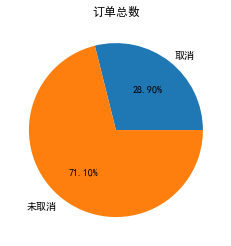

In [21]:
labels = ['取消','未取消']
X = [order_cancel, order_num-order_cancel]
fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%')
# autopct :控制饼图内百分比设置, '%1.1f'指小数点前后位数(没有用空格补齐)；
plt.title("订单总数")

In [22]:
df2 = df.copy()
df2 = df2[(df2['sale_ord_valid_flag'] == 1)&(df2['cancel_flag'] == 0)&('before_prefr_unit_price'!= 0)] # df2只包含有效订单

#有效订单数量
order_vaild = df2['sale_ord_id'].count()
print(order_vaild)

#支付订单数量
order_payed = df2['sale_ord_id'][df2['user_actual_pay_amount'] != 0].count()
print(order_payed)

#未支付订单数量
order_unpay = df2['sale_ord_id'][df2['user_actual_pay_amount'] == 0].count()
order_unpay

33846
28769


5077

Text(0.5, 1.0, '有效订单总数')

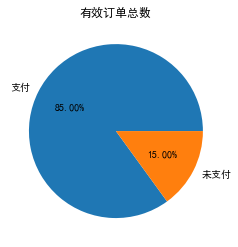

In [23]:
labels = ['支付','未支付']
Y = [order_payed, order_unpay]
fig = plt.figure(5)
plt.pie(Y,labels=labels,autopct='%1.2f%%')
plt.title("有效订单总数")


### 订单的价格分布

In [24]:
price_series = df2['after_prefr_unit_price'] #赋值
price_series

0        1099.0
1        1099.0
2        1099.0
3        1099.0
4        1099.0
          ...  
76621     999.0
76624     769.0
76625     690.0
76626     769.0
76629     690.0
Name: after_prefr_unit_price, Length: 33846, dtype: float64

In [25]:
price_series_num = price_series.count() # 优惠后单价数统计
hist, bin_edges = np.histogram(price_series, bins=80) #生成直方图函数
hist_sum = np.cumsum(hist)
hist_per = hist_sum / price_series_num
print('hist:{}'.format(hist))
print('*'*100)
print('bin_edges:{}'.format(bin_edges))
print('*'*100)
print('hist_sum:{}'.format(hist_sum))

hist:[   3 1526 4719  817 3544 2705 3392  979 2078  430 1201 1099  905 1295
  189  896  912  866  832  235  849 1340  359  207  136  223  258   52
   40  235  121    5  221  118  303   96   51   52    0  161    0   20
    1   52    1    0   21    6    0    0  137    0    1   58    0    0
    4    1    2    2    0    2    0    0    0   24   45    0    3    0
    1    1    0    1    0    0    1    0    0   12]
****************************************************************************************************
bin_edges:[1.0000000e+00 1.5947500e+02 3.1795000e+02 4.7642500e+02 6.3490000e+02
 7.9337500e+02 9.5185000e+02 1.1103250e+03 1.2688000e+03 1.4272750e+03
 1.5857500e+03 1.7442250e+03 1.9027000e+03 2.0611750e+03 2.2196500e+03
 2.3781250e+03 2.5366000e+03 2.6950750e+03 2.8535500e+03 3.0120250e+03
 3.1705000e+03 3.3289750e+03 3.4874500e+03 3.6459250e+03 3.8044000e+03
 3.9628750e+03 4.1213500e+03 4.2798250e+03 4.4383000e+03 4.5967750e+03
 4.7552500e+03 4.9137250e+03 5.0722000e+03 5.230675

In [26]:
hist_per

array([8.86367665e-05, 4.51752053e-02, 1.84600839e-01, 2.08739585e-01,
       3.13449152e-01, 3.93369970e-01, 4.93588607e-01, 5.22513739e-01,
       5.83909472e-01, 5.96614076e-01, 6.32098328e-01, 6.64568930e-01,
       6.91307688e-01, 7.29569225e-01, 7.35153342e-01, 7.61626189e-01,
       7.88571766e-01, 8.14158246e-01, 8.38740176e-01, 8.45683389e-01,
       8.70767594e-01, 9.10358683e-01, 9.20965550e-01, 9.27081487e-01,
       9.31099687e-01, 9.37688353e-01, 9.45311115e-01, 9.46847486e-01,
       9.48029309e-01, 9.54972523e-01, 9.58547539e-01, 9.58695267e-01,
       9.65224842e-01, 9.68711221e-01, 9.77663535e-01, 9.80499911e-01,
       9.82006736e-01, 9.83543107e-01, 9.83543107e-01, 9.88299947e-01,
       9.88299947e-01, 9.88890859e-01, 9.88920404e-01, 9.90456775e-01,
       9.90486320e-01, 9.90486320e-01, 9.91106778e-01, 9.91284051e-01,
       9.91284051e-01, 9.91284051e-01, 9.95331797e-01, 9.95331797e-01,
       9.95361343e-01, 9.97074987e-01, 9.97074987e-01, 9.97074987e-01,
      

In [27]:
bin_edges_plot = np.delete(bin_edges, 0)

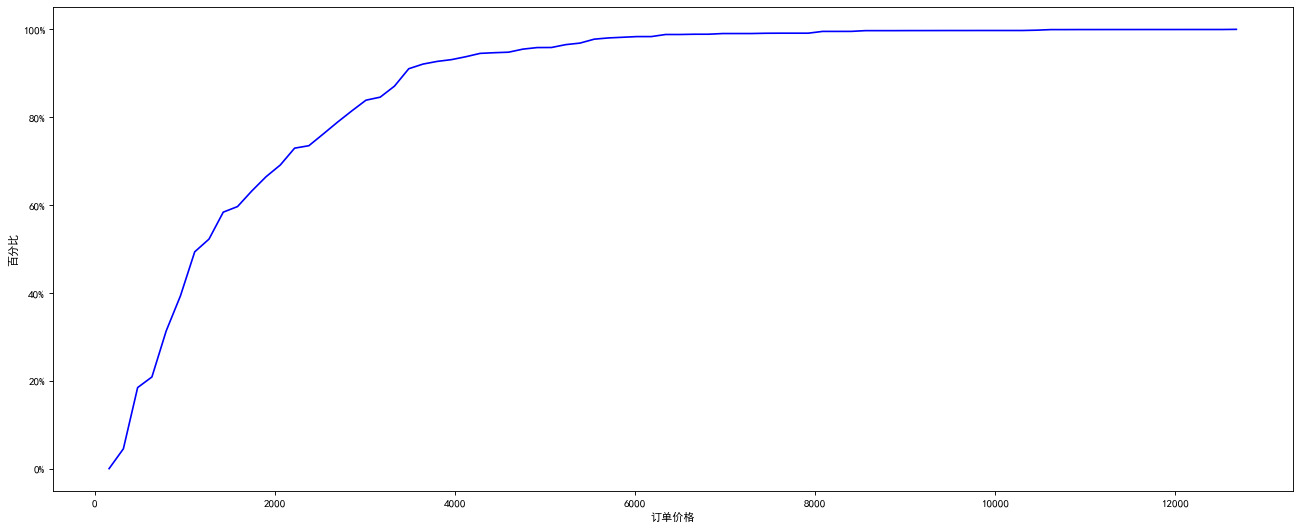

In [28]:
plt.figure(figsize=(20,8), dpi=80)
plt.xlabel('订单价格')
plt.ylabel('百分比')
plt.style.use('ggplot')
def to_percent(temp, position):
 return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.plot(bin_edges_plot, hist_per, color='blue')

## 微观分析
### 有效订单量

In [29]:
df3 = df2.copy() # 副本
df3['order_time_hms'] = df3['sale_ord_tm'].apply(lambda x: x.strftime('%H:00:00'))
# 订单时间
df3

,user_log_acct,parent_sale_ord_id,sale_ord_id,sale_ord_tm,sale_ord_dt,item_sku_id,item_name,brandname,sale_qtty,item_first_cate_name,...,cancel_flag,check_account_tm,total_offer_amount,self_ord_flag,user_site_city_id,user_site_province_id,user_lv_cd,check_account_tm,total_actual_pay,order_time_hms
0,linfbi007,116828823929,116828823929,2020-05-25 18:09:39,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 18:10:23.0,400.0,1,757,10,61,2020-05-25 18:10:23,1099.0,18:00:00
1,13601089905_p,116769479986,121562216719,2020-05-25 00:04:15,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 00:05:59.0,400.0,1,0,0,62,2020-05-25 00:05:59,1099.0,00:00:00
2,jd_UbSjKwFGOfbv,116815391384,116809219025,2020-05-25 13:47:33,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 14:08:28.0,400.0,1,Not Given,Not Given,50,2020-05-25 14:08:28,1099.0,13:00:00
3,yangwangjun1300,116814673181,116814673181,2020-05-25 14:34:25,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,2020-05-25 14:34:47.0,400.0,1,1655,19,61,2020-05-25 14:34:47,1099.0,14:00:00
4,jd_77dbadc203044,116811074034,116811074034,2020-05-25 14:47:42,2020-05-25,100000350860,新飞（Frestec）190升 风冷无霜 电脑双门冰箱（钛空银）BCD-190WL2D,新飞（Frestec）,1,家用电器,...,0,NaN,400.0,1,Not Given,Not Given,56,NaT,1099.0,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76621,513401ZMD001,116786238803,116786238803,2020-05-25 09:33:51,2020-05-25,990705,创维(Skyworth)160升双门冰箱 金属无痕面板 快速冷冻 节能实用型冰箱(炫银)BC...,创维（Skyworth）,1,家用电器,...,0,2020-05-25 09:33:51.0,0.0,1,Not Given,Not Given,105,2020-05-25 09:33:51,999.0,09:00:00
76624,jd_7b852d8fa7721,116798024469,116798024469,2020-05-25 11:40:35,2020-05-25,990705,创维 (SKYWORTH) 160升 冰箱小型双门两门 家用宿舍租房老人 匀冷微霜 除菌率9...,创维（Skyworth）,1,家用电器,...,0,2020-05-25 11:40:50.0,150.0,1,0,0,62,2020-05-25 11:40:50,769.0,11:00:00
76625,350583ZMD066,116804271579,116804271579,2020-05-25 15:40:45,2020-05-25,990705,创维（Skyworth）160升双门冰箱 金属无痕面板 快速冷冻 节能实用型冰箱（炫银）BC...,创维（Skyworth）,1,家用电器,...,0,2020-05-25 15:40:45.0,309.0,1,Not Given,Not Given,105,2020-05-25 15:40:45,690.0,15:00:00
76626,sd32513500,116849959579,116849959579,2020-05-25 21:48:53,2020-05-25,990705,创维 (SKYWORTH) 160升 冰箱小型双门两门 家用宿舍租房老人 匀冷微霜 除菌率9...,创维（Skyworth）,1,家用电器,...,0,2020-05-25 21:51:03.0,150.0,1,0,0,50,2020-05-25 21:51:03,769.0,21:00:00


### 时间维度来对订单数据进行拆分-人均有效订单量


In [30]:
pay_time_df = df3.groupby('order_time_hms')['sale_ord_id'].count()# 分组统计每个时间段的订单数
pay_time_df

order_time_hms
00:00:00    4032
01:00:00     406
02:00:00     146
03:00:00     101
04:00:00      93
05:00:00     216
06:00:00     461
07:00:00     692
08:00:00    1091
09:00:00    1602
10:00:00    2043
11:00:00    1850
12:00:00    1893
13:00:00    1696
14:00:00    1697
15:00:00    1620
16:00:00    1607
17:00:00    1774
18:00:00    1620
19:00:00    1953
20:00:00    2445
21:00:00    1957
22:00:00    1753
23:00:00    1098
Name: sale_ord_id, dtype: int64

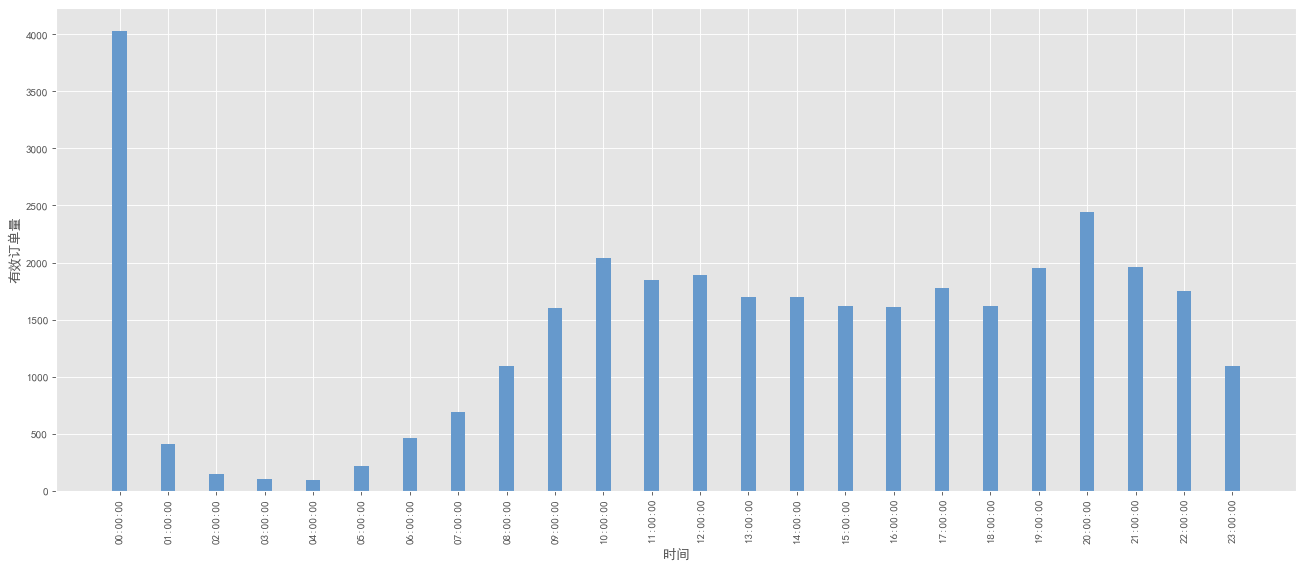

In [31]:
#画图
x = pay_time_df.index
y = pay_time_df.values
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("有效订单量")
plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

### 时间维度来对订单数据进行拆分-人均有效订单量

In [32]:
order_time_df = df3.groupby('order_time_hms')['sale_ord_id'].agg({('order_num','count')})#分组统计
order_time_df

,order_num
order_time_hms,
00:00:00,4032
01:00:00,406
02:00:00,146
03:00:00,101
04:00:00,93
05:00:00,216
06:00:00,461
07:00:00,692
08:00:00,1091


In [33]:
user_time_df = df3.groupby('order_time_hms')['user_log_acct'].agg({('user_num','nunique')})#分组统计
user_time_df

,user_num
order_time_hms,
00:00:00,3799
01:00:00,377
02:00:00,143
03:00:00,101
04:00:00,93
05:00:00,207
06:00:00,450
07:00:00,661
08:00:00,1062


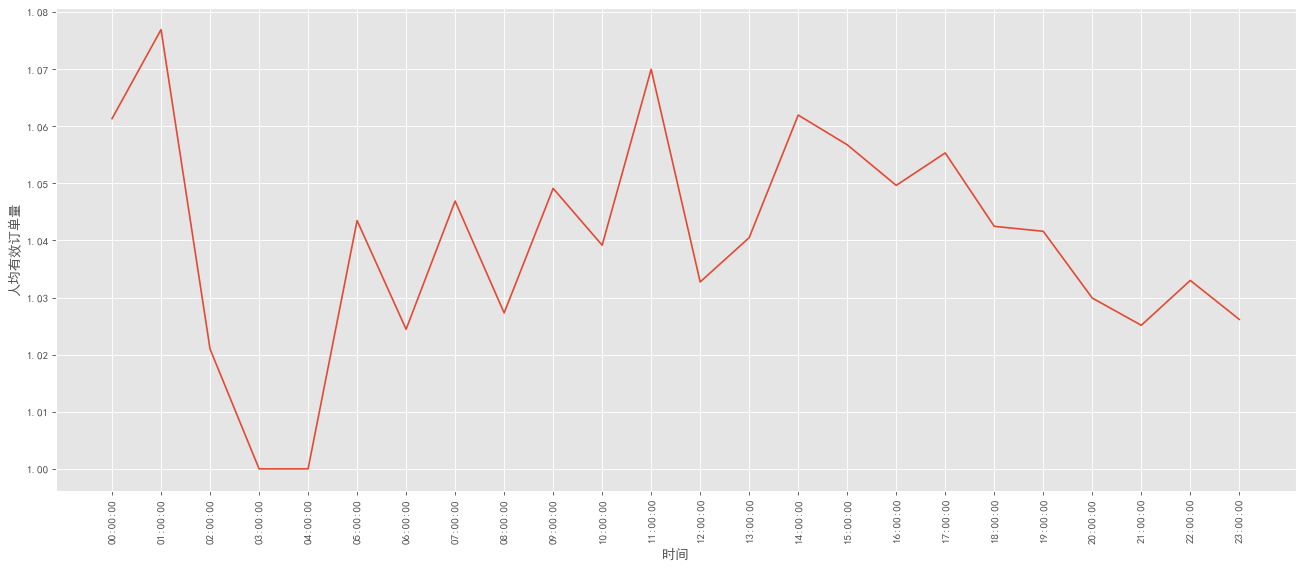

In [34]:
#画图
order_num_per_user = order_time_df['order_num'] / user_time_df['user_num']
x = order_num_per_user.index
y = order_num_per_user.values
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("人均有效订单量")
plt.xticks(range(len(x)),x,rotation=90)
plt.plot(x, y)


### 客单价和平均订单价格

In [35]:
total_pay_time_df = df3.groupby('order_time_hms')['total_actual_pay'].agg({('total_pay','sum')})#分组统计
#按小时分组，对支付金额求和
total_pay_time_df

,total_pay
order_time_hms,
00:00:00,11909925.00
01:00:00,885705.70
02:00:00,297508.92
03:00:00,242141.00
04:00:00,206095.00
05:00:00,517820.23
06:00:00,1014900.00
07:00:00,1502330.99
08:00:00,2034257.26


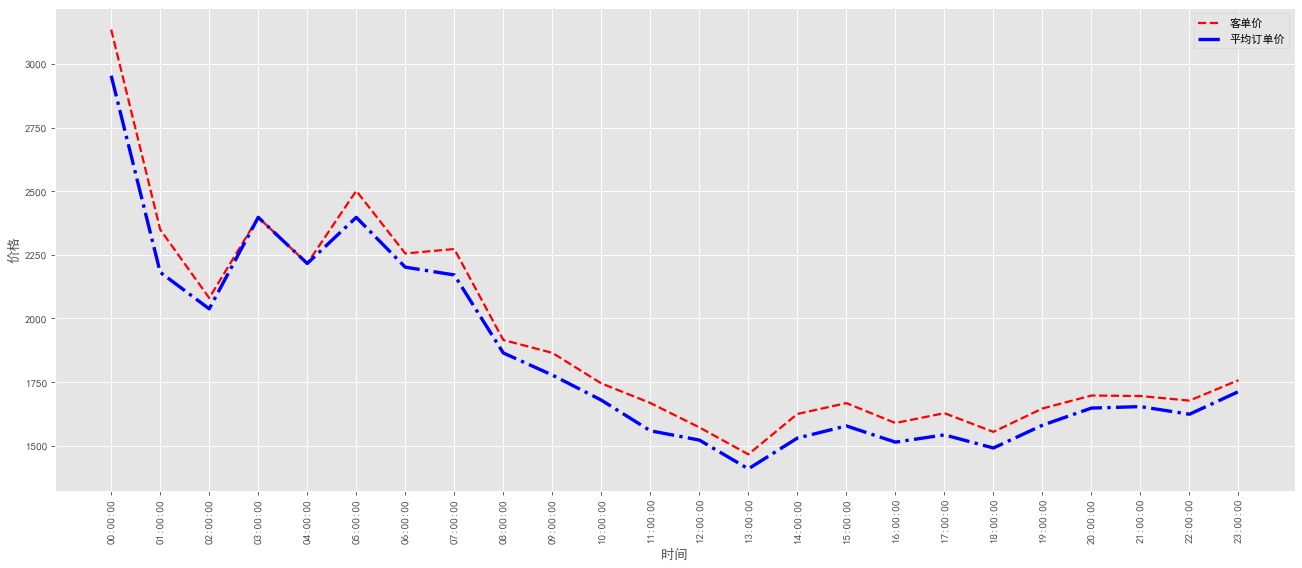

In [36]:
pay_per_user = total_pay_time_df['total_pay'] / user_time_df['user_num'] # 客单价：销售额 / 顾客数
pay_per_order = total_pay_time_df['total_pay'] / order_time_df['order_num'] # 平均订单价：销售额/ 订单数
x = pay_per_user.index
y = pay_per_user.values
y2 = pay_per_order.values
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("价格")
plt.xticks(range(len(x)),x,rotation=90)
plt.plot(x, y, color='red',linewidth=2.0,linestyle='--')
plt.plot(x, y2, color='blue',linewidth=3.0,linestyle='-.')
plt.legend(['客单价','平均订单价'])

### 价格累积分布图

In [37]:
df4 = df3.copy()
df5 = df3.copy()
df4 = df4[df4['order_time_hms'] == '00:00:00']
df5 = df5[df5['order_time_hms'] == '20:00:00']

In [38]:
def plot_acc_line(price_series, bin_num):
 len = price_series.count()
 hist, bin_edges = np.histogram(price_series, bins=bin_num) #生成直方图函数
 hist_sum = np.cumsum(hist)
 hist_per = hist_sum / len * 100
 hist_per_plot = np.insert(hist_per, 0, 0)
 plt.figure(figsize=(20,8), dpi=80)
 plt.xlabel('订单价格')
 plt.ylabel('百分比')
 plt.plot(bin_edges, hist_per_plot, color='blue')

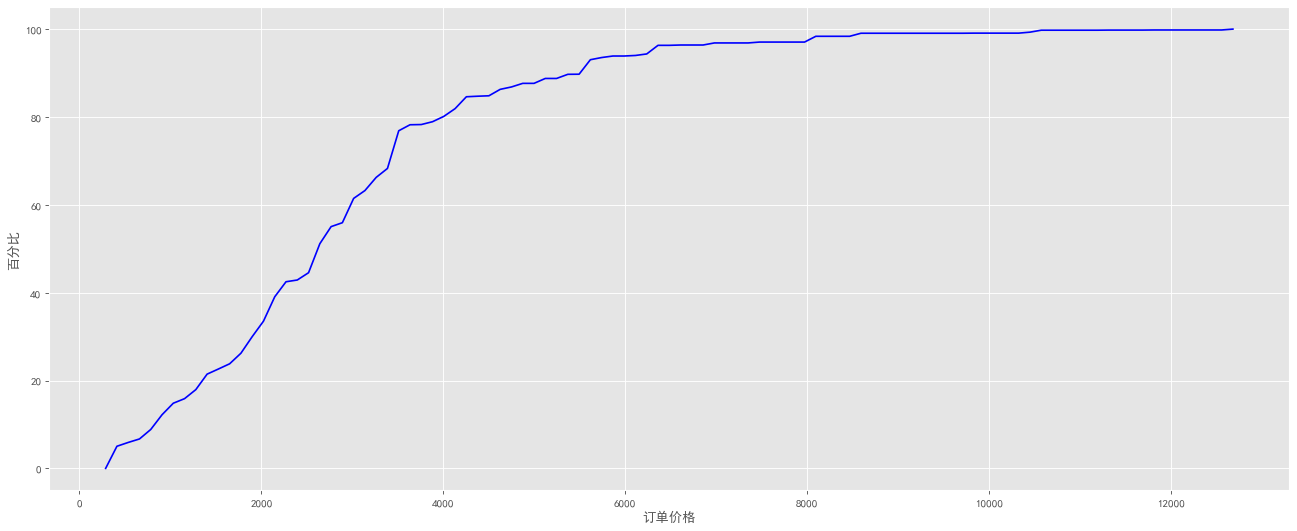

In [39]:
# 0时价格累积分布折线图
price_series_0 = df4['after_prefr_unit_price']
plot_acc_line(price_series_0, 100)

## 从时间维度对订单进行拆分

In [40]:
#0时的优惠订单数
offer_order_0 = df4['sale_ord_id'][df4['total_offer_amount'] > 0].count()
#0时订单数
order_num_0 = df4['sale_ord_id'].count()
#0时优惠订单比
offer_order_per_0 = offer_order_0 / order_num_0
print('0时的优惠订单数:{}, 0时的订单数:{}, 优惠订单比例：{}'.format(offer_order_0, order_num_0,
offer_order_per_0))

0时的优惠订单数:3788, 0时的订单数:4032, 优惠订单比例：0.939484126984127


In [41]:
#全部优惠订单数
offer_order_all = df3['sale_ord_id'][df3['total_offer_amount'] > 0].count()
#全部订单数
order_all = df3['sale_ord_id'].count()
#其他时间优惠订单数
offer_order_other = offer_order_all - offer_order_0
#其他时间订单数
order_num_other = order_all - order_num_0
offer_order_per_other = offer_order_other / order_num_other
print('其他时间的优惠订单数:{}, 其他时间的订单数:{}, 其他时间优惠订单比例：{}'.format(offer_order_other, order_num_other, offer_order_per_other))


其他时间的优惠订单数:25983, 其他时间的订单数:29814, 其他时间优惠订单比例：0.8715033205876433


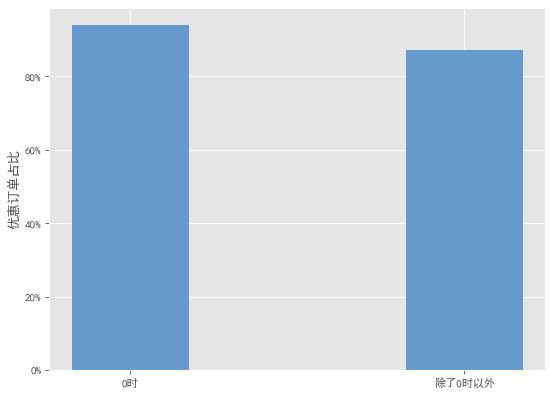

In [42]:
#0时和其他时间的优惠订单的占比对比:可视化
plt.figure(figsize=(8, 6), dpi=80)
N = 2
index = ('0时', '除了0时以外')
data = (offer_order_per_0, offer_order_per_other)
width = 0.35
plt.ylabel("优惠订单占比")
def to_percent(temp, position):
 return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
p2 = plt.bar(index, data, width, color='#6699CC')

In [43]:
total_pay_time_df = df3.groupby('order_time_hms')['total_offer_amount'].agg({('total_offer_amount','sum')})#分组统计
#  按行按列分组聚和，计算每小时订单总额
total_pay_time_df

,total_offer_amount
order_time_hms,
00:00:00,2773061.00
01:00:00,245842.00
02:00:00,64832.00
03:00:00,49619.00
04:00:00,42450.00
05:00:00,109581.00
06:00:00,215421.00
07:00:00,347409.00
08:00:00,555511.00


In [44]:
offer_amount_0 = total_pay_time_df['total_offer_amount'][0]
offer_amount_other = total_pay_time_df[1:].apply(lambda x: x.sum())['total_offer_amount'] #按行求和
offer_amount_0_avg = offer_amount_0 / offer_order_0
offer_amount_other_avg = offer_amount_other / offer_order_other
print('0时平均优惠价格:{}, 其他时间平均优惠价格:{}'.format(offer_amount_0_avg, offer_amount_other_avg))

0时平均优惠价格:732.0646779303062, 其他时间平均优惠价格:456.9508043720895


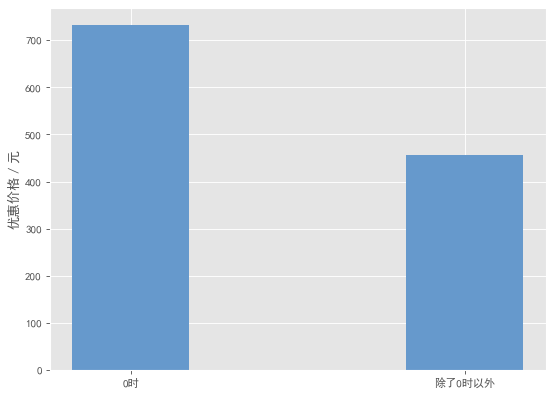

In [45]:
#0时和其他时间的平均优惠价格对比：可视化
plt.figure(figsize=(8, 6), dpi=80)
N = 2
index = ('0时', '除了0时以外')
values = (offer_amount_0_avg, offer_amount_other_avg)
width = 0.35
plt.ylabel("优惠价格／元")
p2 = plt.bar(index, values, width, color='#6699CC')

## 从地区维度对订单进行拆分

In [46]:
df6 = df2.copy()

order_area_df = df6.groupby('user_site_province_id', as_index=False)['sale_ord_id'].agg({'order_num':'count'})#分组统计
# 分组聚和用户所在省份编号和订单数
order_area_df.columns = ['province_id','order_num']
order_area_df

,province_id,order_num
0,0,9883
1,1,1180
2,10,88
3,11,40
4,12,714
5,13,394
6,14,194
7,15,444
8,16,254
9,17,331


In [47]:
order_area_df.drop([34], inplace=True)
order_area_df['province_id']=order_area_df['province_id'].astype('int')
# 赋值改类型
order_area_df

,province_id,order_num
0,0,9883
1,1,1180
2,10,88
3,11,40
4,12,714
5,13,394
6,14,194
7,15,444
8,16,254
9,17,331


In [48]:
# 导入城市数据
city = 'city_level.csv'
df_city = pd.read_csv(city,sep = ',', encoding="gbk", dtype=str)
df_city['province_id'] = df_city['province_id'].astype('int')
df_city

,dim_city_id,dim_city_name,city_id,dim_province_id,dim_province_name,province_id,city_level
0,1000,济南市,1000,13,山东,13,二线
1,1007,青岛市,1007,13,山东,13,二线
2,1016,淄博市,1016,13,山东,13,三线
3,1022,枣庄市,1022,13,山东,13,四线
4,1025,东营市,1025,13,山东,13,三线
...,...,...,...,...,...,...,...
473,965,南通市,965,12,江苏,12,三线
474,972,镇江市,972,12,江苏,12,三线
475,978,常州市,978,12,江苏,12,三线
476,984,无锡市,984,12,江苏,12,二线


In [49]:
df_city = df_city.drop_duplicates(subset=['province_id'], keep='first') 
# 保留重复数据的第一个，也就是只保留省份数据
df_city

,dim_city_id,dim_city_name,city_id,dim_province_id,dim_province_name,province_id,city_level
0,1000,济南市,1000,13,山东,13,二线
16,1114,铜陵市,1114,14,安徽,14,四线
21,113,万州区,113,4,重庆,4,二线
28,1158,宁波市,1158,15,浙江,15,二线
51,1303,福州市,1303,16,福建,16,二线
53,1310,钓鱼岛,1310,84,钓鱼岛,84,NaN
69,1381,武汉市,1381,17,湖北,17,二线
77,142,石家庄市,142,5,河北,5,三线
87,1482,长沙市,1482,18,湖南,18,二线
101,15945,阿拉尔市,15945,31,新疆,31,五线


In [67]:
df_city = df_city[['province_id','dim_province_name']].sort_values(by='province_id',ascending=True).reset_index()
# 按城市编号降序排列
df_city.drop(['index'], axis=1, inplace=True)
# 删除index列
df_city

,index,province_id,dim_province_name
0,0,1,北京
1,1,2,上海
2,2,3,天津
3,3,4,重庆
4,4,5,河北
5,5,6,山西
6,6,7,河南
7,7,8,辽宁
8,8,9,吉林
9,9,10,黑龙江


In [51]:
order_province_df = pd.merge(order_area_df, df_city, on='province_id').sort_values(by='order_num', ascending=False)
# 按各省订单数降序排列
order_province_df

,province_id,order_num,dim_province_name
10,19,1831,广东
0,1,1180,北京
3,12,714,江苏
11,2,592,上海
14,22,557,四川
6,15,444,浙江
4,13,394,山东
8,17,331,湖北
29,7,294,河南
19,27,289,陕西


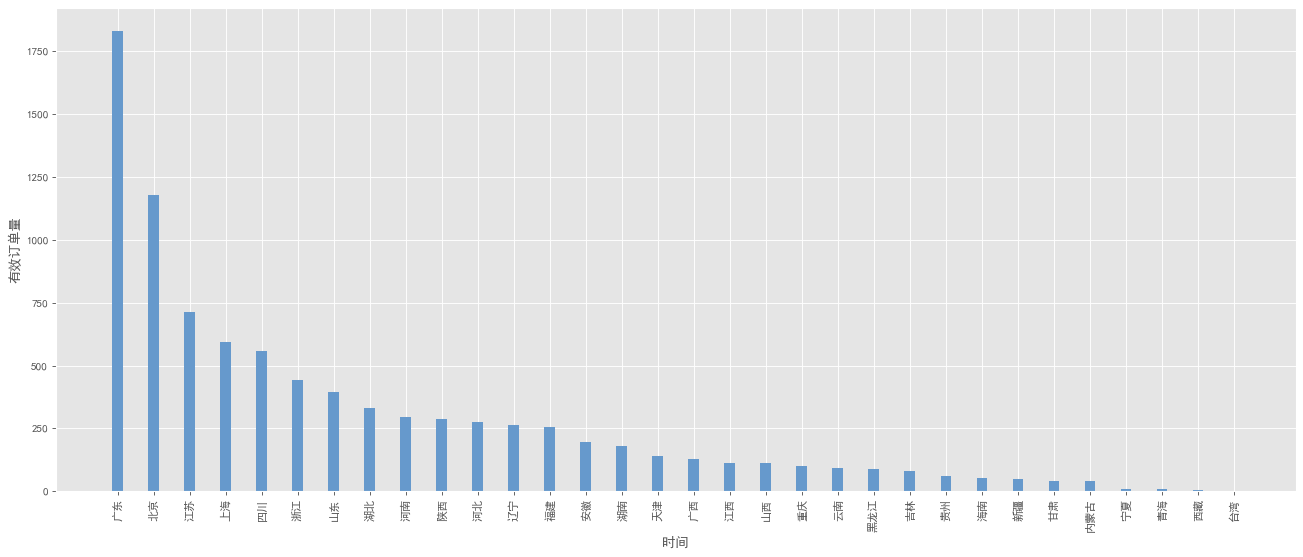

In [52]:
#有效订单量
plt.style.use('ggplot')
x = order_province_df['dim_province_name']
y = order_province_df['order_num']
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("有效订单量")
plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

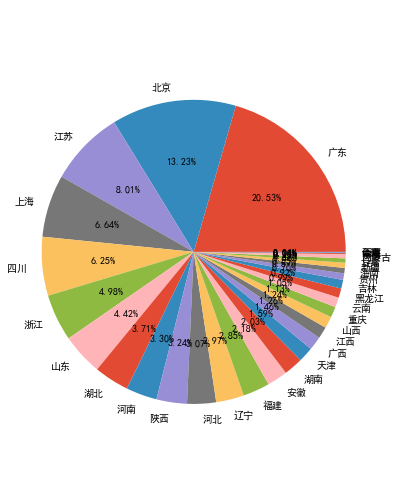

In [53]:
#有效订单量-饼图
plt.figure(figsize=(6,9))
labels = order_province_df['dim_province_name']
plt.pie(order_province_df['order_num'], labels=labels,autopct='%1.2f%%') # autopct :控制饼图内百分比设置, '%1.1f'指小数点前后位数(没有用空格补齐)；
plt.axis('equal')
plt.show()

In [54]:
#各省份客单价对比
cust_price_df = df6.groupby('user_site_province_id', as_index=False)['total_actual_pay'].agg({'total_pay':'sum'})
cust_price_df.columns = ['province_id','total_pay']
cust_price_df.drop([34], inplace=True)
cust_price_df['province_id'] = cust_price_df['province_id'].astype('int')
cust_price_df = pd.merge(cust_price_df, df_city, on='province_id').sort_values(by='total_pay', ascending=False)
cust_price_df['order_num'] = order_province_df['order_num']
cust_df = df6.groupby('user_site_province_id', as_index=False)['user_log_acct'].agg({'user_num':'nunique'})
cust_df.columns = ['province_id','user_num']
cust_df.drop([34], inplace=True)
cust_df['province_id'] = cust_df['province_id'].astype('int')
cust_price_df = pd.merge(cust_price_df, cust_df, on='province_id')
cust_price_df['cust_price'] = cust_price_df['total_pay'] / cust_price_df['user_num'] #计算客单价
cust_price_df = cust_price_df.sort_values(by='order_num', ascending=False)
cust_price_df = cust_price_df[:10]
cust_price_df = cust_price_df.sort_values(by='cust_price', ascending=False)
cust_price_df


,province_id,total_pay,dim_province_name,order_num,user_num,cust_price
3,2,1425442.00,上海,592,538,2649.520446
5,13,938661.01,山东,394,383,2450.812037
2,12,1603704.00,江苏,714,704,2277.988636
1,1,2548956.74,北京,1180,1135,2245.776863
6,15,937725.00,浙江,444,422,2222.097156
7,17,712541.00,湖北,331,327,2179.024465
4,22,1104843.00,四川,557,548,2016.136861
9,27,564524.00,陕西,289,287,1966.982578
0,19,3547611.01,广东,1831,1813,1956.762830
11,7,499252.64,河南,294,285,1751.763649


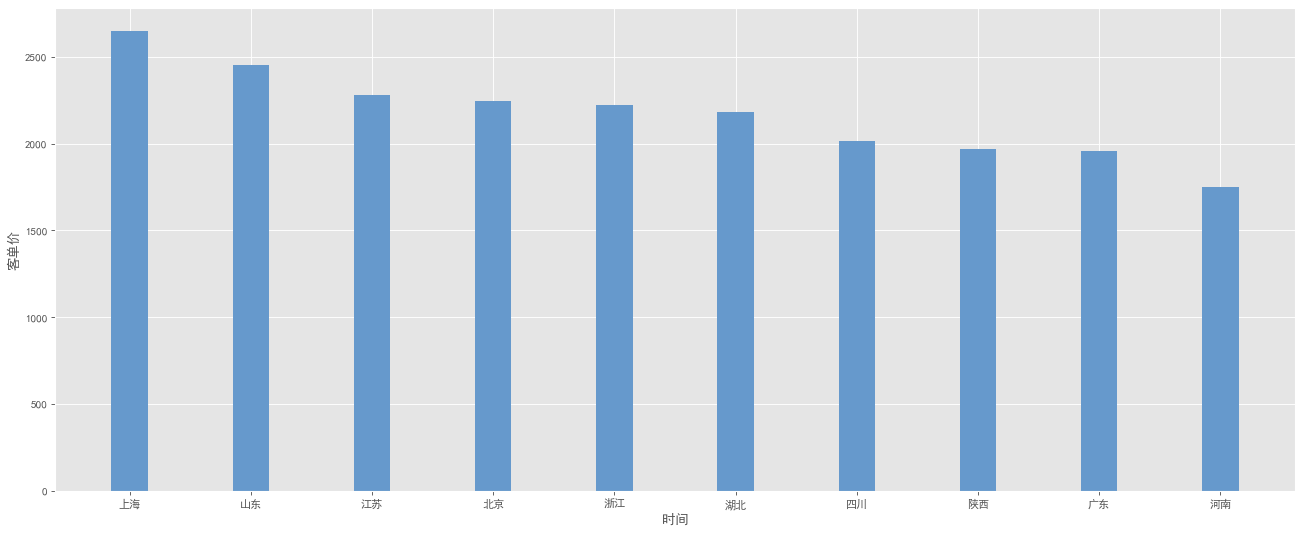

In [55]:
plt.style.use('ggplot')
#使用样式
x = cust_price_df['dim_province_name']
y = cust_price_df['cust_price']
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('时间')
plt.ylabel("客单价")
rect = plt.bar(x, y, width=0.3, color=['#6699CC'])

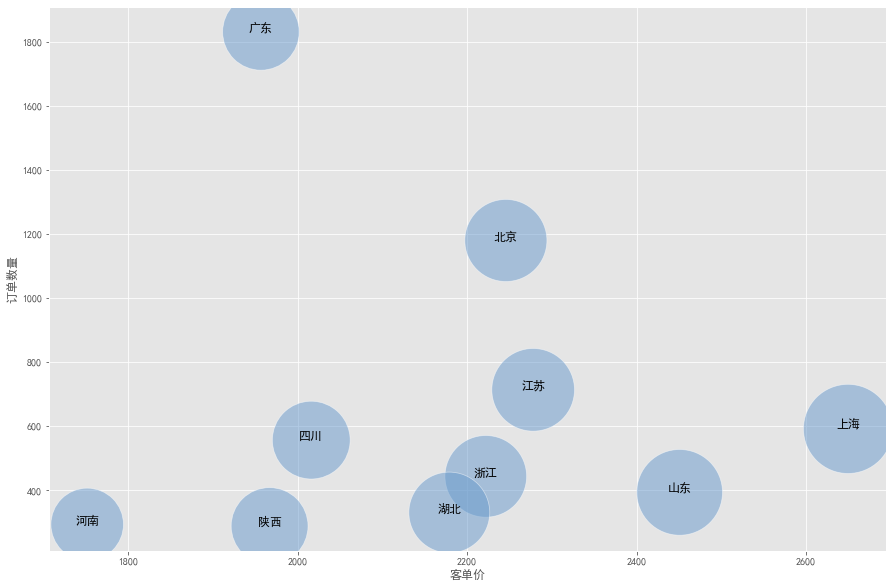

In [56]:
plt.figure(figsize = (15,10))
x = cust_price_df['cust_price']
y = cust_price_df['order_num']
ax = sns.scatterplot(x, y, alpha=0.5, s=x*3, c=['#6699CC']) # 绘制气泡图. alpha是不透明度
ax.set_xlabel("客单价",fontsize=12)
ax.set_ylabel("订单数量",fontsize=12)
province_list = [3,5,2,1,6,7,4,9,0,11]
# 在气泡上加文字
for line in province_list:
 ax.text(x[line], y[line], cust_price_df['dim_province_name'][line], horizontalalignment='center', size='large', color='black', weight='semibold')

## 头部省份的四个品牌的渗透率

In [57]:
#不同品牌的产品单价
df7 = df2.copy()
brand_sale_df = df7.groupby('brandname', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
brand_sale_df

,brandname,total_actual_pay,sale_qtty
30,海尔（Haier）,16634130.64,7540
13,容声（Ronshen）,11813300.63,5989
37,西门子（SIEMENS）,6738061.09,1260
35,美的（Midea）,4473746.14,2709
29,海信（Hisense）,2663095.57,1720
17,康佳（KONKA）,2276290.54,2584
25,松下（Panasonic）,2146912.00,453
36,美菱（MeiLing）,1787125.73,890
0,TCL,1578416.85,1419
27,格力（GREE）,1426076.00,726


In [58]:
df8 = df7.copy()
df8 = df8[df8['user_site_province_id'] == '1'] # 省份取北京，数字是省份id
brand_sale_df_bj = df8.groupby('brandname', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
brand_sale_df_bj = brand_sale_df_bj[(brand_sale_df_bj['brandname'] == '海尔（Haier）')|(brand_sale_df_bj['brandname'] == '容声（Ronshen）')|(brand_sale_df_bj['brandname'] == '西门子（SIEMENS）')|(brand_sale_df_bj['brandname'] == '美的（Midea）')]
brand_sale_df_bj

,brandname,total_actual_pay,sale_qtty
26,海尔（Haier）,820296.00,325
33,西门子（SIEMENS）,413613.00,79
12,容声（Ronshen）,276533.00,122
31,美的（Midea）,100864.14,63


In [59]:
df8 = df7.copy()
df8 = df8[df8['brandname'] == '海尔（Haier）']
brand_sale_df_haier = df8.groupby('user_site_province_id', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
# 用户所在省份编号降序，分组聚和
brand_sale_df_haier = brand_sale_df_haier[(brand_sale_df_haier['user_site_province_id'] == '1')|(brand_sale_df_haier['user_site_province_id'] == '2')|(brand_sale_df_haier['user_site_province_id'] == '12')|(brand_sale_df_haier['user_site_province_id'] == '22')|(brand_sale_df_haier['user_site_province_id'] == '19')]
# 查看指定省份数据
brand_sale_df_haier['user_site_province_id'] = brand_sale_df_haier['user_site_province_id'].astype('int')
brand_sale_df_haier.columns = ['province_id','total_actual_pay', 'sale_qtty']
# 重命名
brand_sale_df_haier.sort_values(by='province_id')

,province_id,total_actual_pay,sale_qtty
1,1,820296.00,325
12,2,316005.00,139
4,12,422743.00,164
11,19,826869.01,366
15,22,291425.00,124


In [60]:
cust_price_df

,province_id,total_pay,dim_province_name,order_num,user_num,cust_price
3,2,1425442.00,上海,592,538,2649.520446
5,13,938661.01,山东,394,383,2450.812037
2,12,1603704.00,江苏,714,704,2277.988636
1,1,2548956.74,北京,1180,1135,2245.776863
6,15,937725.00,浙江,444,422,2222.097156
7,17,712541.00,湖北,331,327,2179.024465
4,22,1104843.00,四川,557,548,2016.136861
9,27,564524.00,陕西,289,287,1966.982578
0,19,3547611.01,广东,1831,1813,1956.762830
11,7,499252.64,河南,294,285,1751.763649


In [61]:
order_num_df = cust_price_df[['province_id', 'order_num']][(cust_price_df['province_id'] == 1)|(cust_price_df['province_id'] == 12)|(cust_price_df['province_id'] == 19)|(cust_price_df['province_id'] == 2)|(cust_price_df['province_id'] == 22)]
order_num_df = order_num_df.sort_values(by='province_id')
order_num_df

,province_id,order_num
1,1,1180
3,2,592
2,12,714
0,19,1831
4,22,557


In [62]:
brand_sale_df_haier = pd.merge(brand_sale_df_haier, order_num_df, on='province_id')
# 计算各省市场渗透率
brand_sale_df_haier['渗透率'] = brand_sale_df_haier['sale_qtty'] / brand_sale_df_haier['order_num']
brand_sale_df_haier

,province_id,total_actual_pay,sale_qtty,order_num,渗透率
0,19,826869.01,366,1831,0.199891
1,1,820296.00,325,1180,0.275424
2,12,422743.00,164,714,0.229692
3,2,316005.00,139,592,0.234797
4,22,291425.00,124,557,0.222621


In [63]:
def province_shentou(df, brandname, cust_price_df):# 自定义函数计算各个品牌渗透率
 df = df[df['brandname'] == brandname]
 brand_sale_df = df.groupby('user_site_province_id', as_index=False).agg({'total_actual_pay':'sum', 'sale_qtty':'sum'}).sort_values(by='total_actual_pay', ascending=False)
 brand_sale_df = brand_sale_df[(brand_sale_df['user_site_province_id'] == '1')|(brand_sale_df['user_site_province_id'] == '2')|(brand_sale_df['user_site_province_id'] == '12')|(brand_sale_df['user_site_province_id'] == '22')|(brand_sale_df['user_site_province_id'] == '19')]
 brand_sale_df['user_site_province_id'] = brand_sale_df['user_site_province_id'].astype('int')
 brand_sale_df.columns = ['province_id','total_actual_pay', 'sale_qtty']
 brand_sale_df.sort_values(by='province_id')
 
 order_num = cust_price_df[['province_id', 'order_num']][(cust_price_df['province_id'] == 1)|(cust_price_df['province_id'] == 12)|(cust_price_df['province_id'] == 19)|(cust_price_df['province_id'] == 2)|(cust_price_df['province_id'] == 22)]
 order_num = order_num.sort_values(by='province_id')
 
 brand_sale_df = pd.merge(brand_sale_df, order_num_df, on='province_id')
 brand_sale_df['渗透率'] = brand_sale_df['sale_qtty'] / brand_sale_df['order_num']
 brand_sale_df = brand_sale_df.sort_values(by='province_id')
 
 return brand_sale_df

In [64]:
df9 = df7.copy()
# 各品牌在个省份的市场渗透率
brand_sale_df_rs = province_shentou(df9, '容声（Ronshen）', cust_price_df)
brand_sale_df_siem = province_shentou(df9, '西门子（SIEMENS）', cust_price_df)
brand_sale_df_mi = province_shentou(df9, '美的（Midea）', cust_price_df)
brand_sale_df_siem

,province_id,total_actual_pay,sale_qtty,order_num,渗透率
1,1,413613.0,79,1180,0.066949
2,2,411564.0,78,592,0.131757
3,12,379749.0,73,714,0.102241
0,19,493163.0,91,1831,0.049700
4,22,159770.0,28,557,0.050269


([<matplotlib.axis.XTick at 0x17056fdd208>,
 <a list of 5 Text xticklabel objects>)

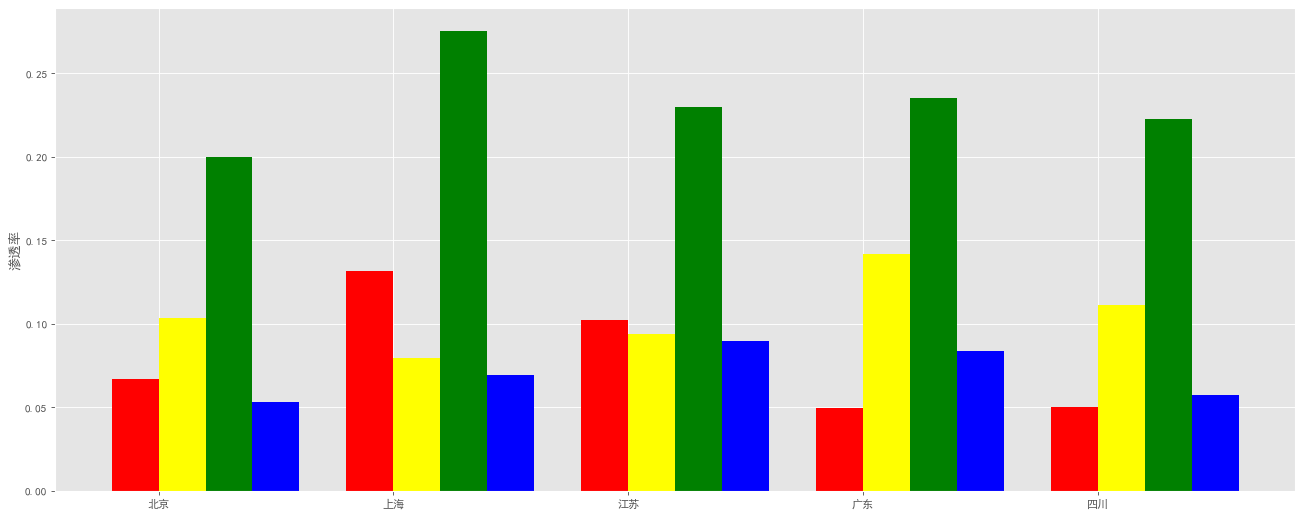

In [65]:
plt.style.use('ggplot')
# 画图
x = np.arange(5)
y1 = brand_sale_df_siem['渗透率']
y2 = brand_sale_df_rs['渗透率']
y3 = brand_sale_df_haier['渗透率']
y4 = brand_sale_df_mi['渗透率']
tick_label=['北京', '上海', '江苏', '广东', '四川']
total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.ylabel("渗透率")
bar_width = 0.2
plt.bar(x, y1, width=bar_width, color=['red'])
plt.bar(x+width, y2, width=bar_width, color=['yellow'])
plt.bar(x+2*width, y3, width=bar_width, color=['green'])
plt.bar(x+3*width, y4, width=bar_width, color=['blue'])
plt.xticks(x+bar_width/2, tick_label) # 显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置

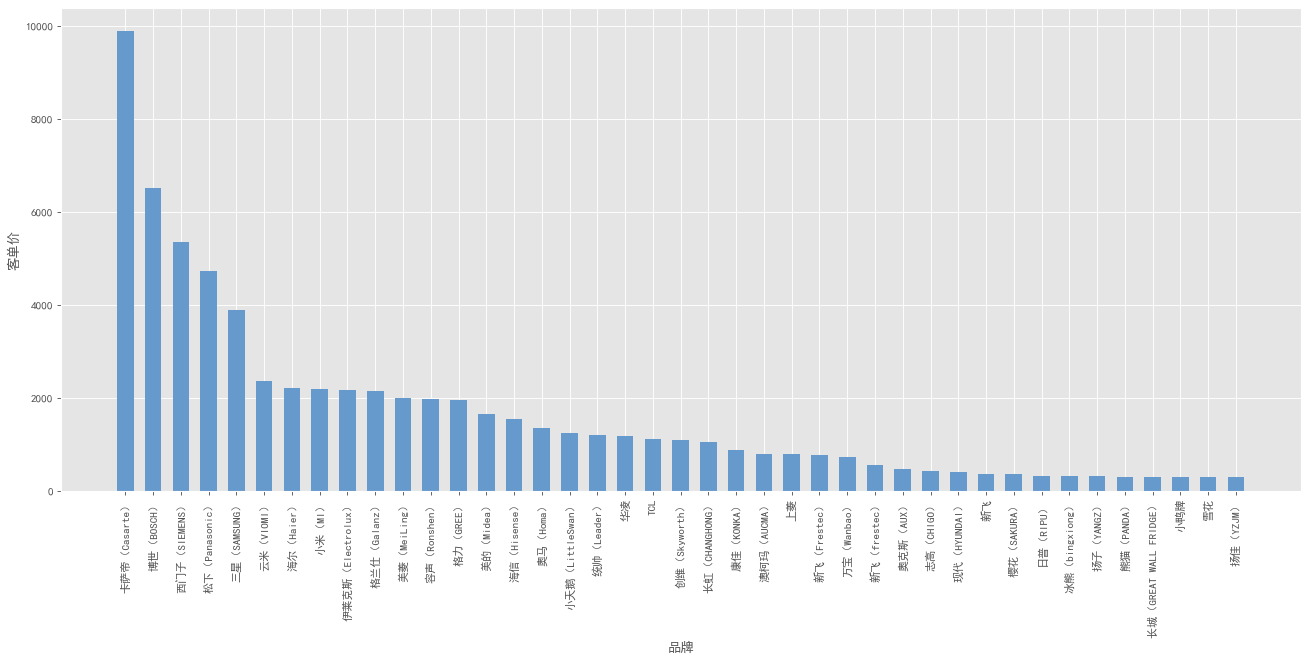

In [66]:
plt.style.use('ggplot')
brand_sale_df['单价'] = brand_sale_df['total_actual_pay'] / brand_sale_df['sale_qtty']
#客单价
brand_sale_df = brand_sale_df.sort_values(by='单价', ascending=False)
x = brand_sale_df['brandname']
y = brand_sale_df['单价']
plt.figure(figsize=(20,8),dpi=80)
plt.style.use('ggplot')
plt.xlabel('品牌')
plt.ylabel("客单价")
plt.xticks(range(len(x)), x, rotation=90)
rect = plt.bar(x, y, width=0.6, color=['#6699CC'])
plt.show()